<a href="https://colab.research.google.com/github/shivakumar17/IPL-anlysis/blob/main/IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
work_space='/content/drive/MyDrive/ipl project/'
df_deliveries=pd.read_csv(work_space+"Copy of deliveries.csv")
df_matches=pd.read_csv(work_space+"Copy of matches.csv")
df_runs_avg_str=pd.read_csv(work_space+"Copy of most_runs_average_strikerate.csv")
df_teams=pd.read_csv(work_space+"Copy of teams.csv")
df_home_away=pd.read_csv(work_space+"Copy of teamwise_home_and_away.csv")

In [4]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
df_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df_runs_avg_str.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [ ]:
df_teams.head()

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions


In [ ]:
df_home_away.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [5]:
df_runs_avg_str.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [6]:
df_runs_avg_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [10]:
df_runs_avg_str['average'].isnull().sum(axis = 0)

34

In [18]:
df_runs_avg_str[df_runs_avg_str['average'].isnull()]

,batsman,total_runs,out,numberofballs,average,strikerate
359,H Brar,20,0,12,NaN,166.666667
366,P Sahu,19,0,13,NaN,146.153846
386,A Joseph,15,0,13,NaN,115.384615
398,DAJ Bracewell,12,0,9,NaN,133.333333
400,AR Bawne,12,0,12,NaN,100.000000
403,K Upadhyay,12,0,9,NaN,133.333333
418,SM Harwood,9,0,13,NaN,69.230769
433,I Malhotra,7,0,4,NaN,175.000000
436,DM Bravo,6,0,5,NaN,120.000000
437,SS Shaikh,6,0,7,NaN,85.714286


In [19]:
df_runs_avg_str['average'].max()

88.0

In [20]:
df_runs_avg_str['average'].min()

0.0

In [24]:
df_r_avg_0=df_runs_avg_str[df_runs_avg_str['average']==0]
df_r_avg_0

,batsman,total_runs,out,numberofballs,average,strikerate
500,K Ahmed,0,1,1,0.0,0.0
501,C Nanda,0,1,1,0.0,0.0
505,S Lamichhane,0,1,1,0.0,0.0
506,RR Bhatkal,0,2,2,0.0,0.0
507,IC Pandey,0,1,2,0.0,0.0
510,Sunny Gupta,0,1,1,0.0,0.0
511,ND Doshi,0,1,13,0.0,0.0
512,J Denly,0,1,1,0.0,0.0
513,S Ladda,0,2,9,0.0,0.0
514,V Pratap Singh,0,1,1,0.0,0.0


In [28]:
df_r_avg_not_0=df_runs_avg_str[df_runs_avg_str['average']!=0]
df_r_avg_not_0

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
502,YA Abdulla,0,0,1,NaN,0.000000
503,U Kaul,0,0,1,NaN,0.000000
504,P Raj,0,0,1,NaN,0.000000
508,L Ablish,0,0,2,NaN,0.000000


In [35]:
df_r_avg_not_0[df_r_avg_not_0['average']==df_r_avg_not_0['average'].min()]

,batsman,total_runs,out,numberofballs,average,strikerate
482,A Singh,2,4,10,0.5,20.000000
487,Shoaib Ahmed,1,2,6,0.5,16.666667


In [37]:
mean_avg=df_r_avg_not_0['average'].mean()
mean_avg

16.737040084132424

In [43]:
df_runs_avg_str['average']=df_runs_avg_str['average'].fillna(mean_avg)

In [44]:
df_runs_avg_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        516 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [45]:
df_runs_avg_str.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [63]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

Text(0, 0.5, 'strikerate')

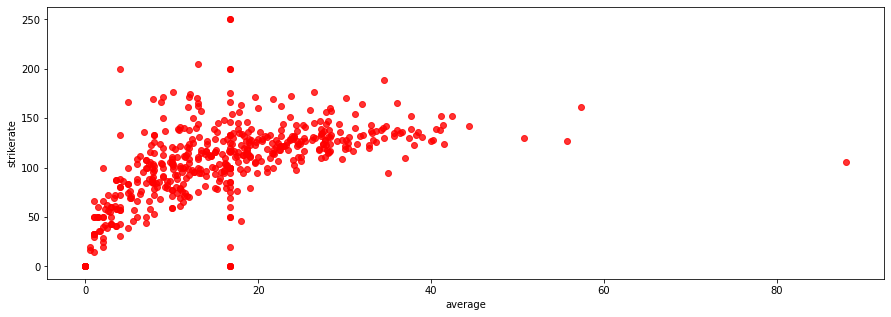

In [69]:

#plt.scatter(df_runs_avg_str['average'],range(0,len(df_runs_avg_str['average']+1)),c='red',alpha=0.8)
plt.scatter(df_runs_avg_str['average'],df_runs_avg_str['strikerate'],c='red',alpha=0.8)
plt.xlabel('average')
plt.ylabel('strikerate')

As we can observe that the player who has better strike rate has an avgerage between 15 to 20